# Importar as bibliotecas necessarias para o processo

In [33]:
#codigo - python
#aqui importamos as bibliotecas a serem utilizadas no processo
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importar os dados

In [9]:
#substitua aqui o endereço no qual você salvou o arquivo.

address="C:/Users/chris/Desktop/Empreendedorismo/Job_To_Be_Done/Dados_Job_To_Be_Done - Dados_Puros.csv"

jtbd = pd.read_csv(address)

# Visualizar os dados

In [11]:
display(jtbd)

,nome,profissao,horario,produtos,local_consumo,job_to_be_done,por_que,volume,volume_porque,acucar,acucar_porque,ajuste_volume,ajuste_acucar
0,Jack,Pirata,10:00,Milk Shake,No barco,Café da Manhã + Passatempo É divertido,"Milk shake em uma mão, leme na outra.","Maior, 700ml",O bastante para duar a viagem,Menos doce do que atual.,Para não enjoar (tá num navio né),"0,4","-0,2"
1,Capitão Gancho,Pirata,09:00,Milk Shake,No barco,Café da Manhã + Passatempo. Mantém acordado,"Milk shake em uma mão, leme na outra.","Maior, 700ml",O bastante para duar a viagem,Menos doce do que atual.,Para não enjoar (tá num navio né),"0,45","-0,15"
2,Barba Ruiva,Pirata,08:00,Milk Shake,No barco,Café da Manhã + Passatempo.,"Milk shake em uma mão, leme na outra.","Maior, 700ml",O bastante para duar a viagem,Menos doce do que atual.,Para não enjoar (tá num navio né),"0,35","-0,2"
3,Capitão Nemo,Pirata,11:00,Milk Shake,No barco,Café da Manhã + Passatempo É divertido,"Milk shake em uma mão, leme na outra.","Maior, 700ml",O bastante para duar a viagem,Menos doce do que atual.,Para não enjoar (tá num navio né),"0,3",0
4,Beth,Pirata,07:00,Milk Shake,No barco,Café da Manhã + Passatempo. Mantém acordado,"Milk shake em uma mão, leme na outra.","Maior, 700ml",O bastante para duar a viagem,Menos doce do que atual.,Para não enjoar (tá num navio né),"0,5",0
5,Ana Maria,Pirata,06:00,Milk Shake,No barco,Café da Manhã + Passatempo.,"Milk shake em uma mão, leme na outra.","Maior, 700ml",O bastante para duar a viagem,Menos doce do que atual.,Para não enjoar (tá num navio né),"0,3","-0,05"
6,Ching,Pirata,08:00,Milk Shake,No barco,Café da Manhã + Passatempo. Mantém acordado,"Milk shake em uma mão, leme na outra.","Maior, 700ml",O bastante para duar a viagem,Menos doce do que atual.,Para não enjoar (tá num navio né),"0,5","-0,1"
7,John,Pescador,17:00,Combo Lanche + Milk Shake,"Em casa, com família",Jantar + Recompensa - Dia difícil,Bebida e sobremesa num só,"Menor, 300ml",Pra conseguir comer com o lanche.,Mais doce que o atual,"Sobremesa, recompensa.","-0,4","0,15"
8,James,Pescador,18:00,Combo Lanche + Milk Shake,"Em casa, com família",Jantar + Recompensa - Deixei os filhos sozinho...,Bebida e sobremesa num só,"Menor, 300ml",Pra conseguir comer com o lanche.,Mais doce que o atual,"Sobremesa, recompensa.","-0,3","0,15"
9,Joshua,Pescador,19:00,Combo Lanche + Milk Shake,"Em casa, com família",Jantar + Recompensa - Deixei os filhos sozinho...,Bebida e sobremesa num só,"Menor, 300ml",Pra conseguir comer com o lanche.,Mais doce que o atual,"Sobremesa, recompensa.","-0,5","0,1"


# Criar tabela (subset) com os dados importantes para o clustering

In [25]:
cluster_jtbd=pd.concat([jtbd.profissao, jtbd.horario, jtbd.ajuste_volume, jtbd.ajuste_acucar], axis=1,ignore_index=True)

#nomeando as colunas da nova tabela
cluster_jtbd.columns=['profissao','horario','volume','acucar']
cluster_jtbd["volume"]=cluster_jtbd["volume"].str.replace(',','.')
cluster_jtbd["acucar"]=cluster_jtbd["acucar"].str.replace(',','.')

cluster_jtbd['volume'] = cluster_jtbd['volume'].astype(float)
cluster_jtbd['acucar'] = cluster_jtbd['acucar'].astype(float)

#cluster_jtbd ['volume'] = pd.to_numeric(cluster_jtbd['volume'], errors='coerce')
#cluster_jtbd ['acucar'] = pd.to_numeric(cluster_jtbd['acucar'], errors='coerce')

# Visualizar Dados

In [26]:
display(cluster_jtbd)

,profissao,horario,volume,acucar
0,Pirata,10:00,0.40,-0.20
1,Pirata,09:00,0.45,-0.15
2,Pirata,08:00,0.35,-0.20
3,Pirata,11:00,0.30,0.00
4,Pirata,07:00,0.50,0.00
5,Pirata,06:00,0.30,-0.05
6,Pirata,08:00,0.50,-0.10
7,Pescador,17:00,-0.40,0.15
8,Pescador,18:00,-0.30,0.15
9,Pescador,19:00,-0.50,0.10


# Análise de Cluster pelas características do produto: Volume e Quantidade de Açucar

In [28]:
# Aqui calculamos os clusters usando a tecnica kmeans
kmeans_2 = KMeans(n_clusters=2).fit(cluster_jtbd[['volume', 'acucar']])
centroids_2 = kmeans_2.cluster_centers_

In [29]:
# aqui adicionamos a classificacao à tabela
cluster_jtbd['kmeans_2'] = kmeans_2.fit_predict(cluster_jtbd[['volume', 'acucar']])
print(cluster_jtbd)

    profissao horario  volume  acucar  kmeans_2
0      Pirata   10:00    0.40   -0.20         0
1      Pirata   09:00    0.45   -0.15         0
2      Pirata   08:00    0.35   -0.20         0
3      Pirata   11:00    0.30    0.00         0
4      Pirata   07:00    0.50    0.00         0
5      Pirata   06:00    0.30   -0.05         0
6      Pirata   08:00    0.50   -0.10         0
7    Pescador   17:00   -0.40    0.15         1
8    Pescador   18:00   -0.30    0.15         1
9    Pescador   19:00   -0.50    0.10         1
10   Pescador   18:00   -0.35    0.15         1
11  Pescadora   20:00   -0.50    0.05         1
12  Pescadora   21:00   -0.45    0.05         1
13  Pescadora   22:00   -0.30    0.05         1


# Representacao Grafica do Cluster

In [34]:
#Aqui definimos as cores de acordo com o cluster

# criando a função
def set_color(kmeans_2):
    if kmeans_2 == 0:
        return 'red'
    if kmeans_2 == 1:
        return 'blue'
    else:
        return 'black'
    
# criando uma nova coluna baseada na condição
cluster_jtbd['color'] = cluster_jtbd['kmeans_2'].apply(set_color)
# display the dataframe
#print(dts_medo_int_ans)

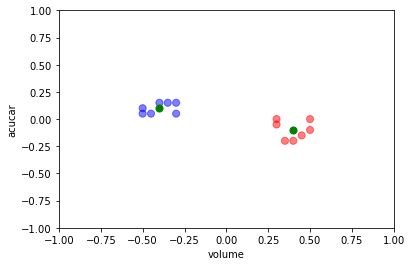

In [37]:
#Aqui apresentamos os clusters de acordo com a cor. Os distintos clusters estão marcados em azul e vermelho, e o centro do cluster é sinalizado em verde.
plt.scatter(cluster_jtbd.volume, cluster_jtbd.acucar, c= cluster_jtbd.color, s=50, alpha=0.5)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='green', s=50)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("volume")
plt.ylabel("acucar")
plt.show()